(a) Perform this:

In [2]:
import numpy as np
rng = np.random
x1 = rng.uniform(0,1,size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2*x1 + 0.3*x2 + rng.normal(size=100)

model looks like y=beta0+beta1 * x + beta2 * x2 + eps
x1 and x2 are our predictors or dependent variables while 2 is beta0,2 beta1 ,  0.3 beta2.

(b)What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

<function matplotlib.pyplot.show(close=None, block=None)>

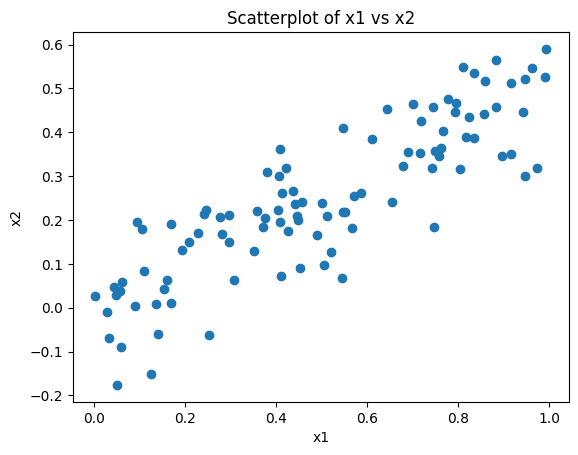

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 vs x2")
plt.show

The scatterplot shows a clear positive linear relationship between x1 and x2. As x1 increases, x2 tends to increase as well. The points are not perfectly on a line due to the added noise term.

(c)Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are β̂₀, β̂₁, and β̂₂? How do these relate to the true β₀, β₁, and β₂? Can you reject the null hypothesis H₀: β₁ = 0? How about the null hypothesis H₀: β₂ = 0?

In [5]:
import statsmodels.api as sm
X_design = np.column_stack((x1, x2))
X_design = sm.add_constant(X_design)
model = sm.OLS(y, X_design).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     28.56
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.76e-10
Time:                        18:34:57   Log-Likelihood:                -147.29
No. Observations:                 100   AIC:                             300.6
Df Residuals:                      97   BIC:                             308.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6243      0.214      7.592      0.0

First of all we can see that our coefficients are unstable because of multicolleniarity,so we can see it below:
b0_hat = 1.6243
b1_hat = 1.2236
b2_hat = 2.7757 

while true values are
b0 =2 
b1 =2
b2 =0.3

Whether to decide to reject or accept the null hypothesis we need look at p-values so x1 has a p-value which is more than 5%,while x2 has a value less than 5%.Therefore we can reject only the null hypothesis about beta2

(d)Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis 
H0:b1 = 0?

In [6]:
X = sm.add_constant(x1)
model1 = sm.OLS(y,X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     49.73
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.51e-10
Time:                        18:48:18   Log-Likelihood:                -149.92
No. Observations:                 100   AIC:                             303.8
Df Residuals:                      98   BIC:                             309.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5872      0.218      7.284      0.0

First of all yes we can reject the null hypothesis because the value of p-value is less than 5%.Also we can see that our beta0 and beta1 became more accurate than before,but R2 value decreased.

(e)Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis 
H0 : b1 = 0?

In [24]:
X2 = sm.add_constant(x2)
model2 = sm.OLS(y,X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     53.34
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           7.53e-11
Time:                        18:53:30   Log-Likelihood:                -148.71
No. Observations:                 100   AIC:                             301.4
Df Residuals:                      98   BIC:                             306.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8043      0.187      9.663      0.0

Again we can look to the p-value and see that its lower than 5% therefore we reject the null hypothesis.While if we consider beta0 and beta1 coefficients we can see that they are less accurate and it's because of omitted variable which we forgot to include,which leads to bias.

(f)Do the results obtained in (c)–(e) contradict each other? Explain your answer.
No,they don't contradict with each other.
In chapter c we observed a linear model which includes all predictors,while in chapter d and e we consiedered only one variable and  other omitted 1,that's why we have different results,but this is the result of omitted variable and multicollinearity.

(g)Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [26]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y  = np.concatenate([y,  [6]])

(new c)

In [27]:
import statsmodels.api as sm
X_design = np.column_stack((x1, x2))
X_design = sm.add_constant(X_design)
model = sm.OLS(y, X_design).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     34.97
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           3.24e-12
Time:                        19:20:05   Log-Likelihood:                -150.69
No. Observations:                 102   AIC:                             307.4
Df Residuals:                      99   BIC:                             315.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6990      0.210      8.084      0.0

In this situation adding this new point has an enourmous impact on this model.Because y = 6 is outlier and we have high-leverage point on X(since 0.8 is far away from majority of points).The result of above thing can be also found from our coefficients,we can see they were 1.62 1.22 2.77 and became 1.69 0.33 4.33.Although our p-value for beta1 is increased while p-value for beta2 is decreased.

(new d)

In [28]:
X = sm.add_constant(x1)
model1 = sm.OLS(y,X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     30.51
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.64e-07
Time:                        19:23:51   Log-Likelihood:                -164.37
No. Observations:                 102   AIC:                             332.7
Df Residuals:                     100   BIC:                             338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8513      0.237      7.810      0.0

After adding the new observations, the estimated coefficients in the model using only x1 became closer to their true values. However, the R-squared value became smaller. This happens because the coefficients reflect the underlying linear relationship, while R-squared measures how well the model fits the actual observed data. The new observations increased the total variation in y more than the variation explained by the model, so the R-squared decreased even though the coefficients became more accurate.

(new e)

In [29]:
X2 = sm.add_constant(x2)
model2 = sm.OLS(y,X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     69.90
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           3.79e-13
Time:                        19:24:40   Log-Likelihood:                -150.92
No. Observations:                 102   AIC:                             305.8
Df Residuals:                     100   BIC:                             311.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7716      0.179      9.895      0.0

After adding the two new observations, the estimated coefficient for x2 moved slightly closer to the true value, and it remained statistically significant. At the same time, the R-squared value increased compared to the original model. This means that the new observations increased the proportion of the variability in y that is explained by x2. In other words, although the added observation was mismeasured, it still aligned with the direction of the relationship between x2 and y, which improved the model fit in terms of R-squared. However, the estimates became slightly less stable due to the increased variance introduced by this new point.